<a href="https://colab.research.google.com/github/Biboswan/TrainingNN_PytorchIntro/blob/master/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
#import helper
import torch
import matplotlib.pyplot as plt

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
def activation(x):
  
  return 1/(1+torch.exp(-x))

In [0]:
torch.manual_seed(7)
# 5 random normal variables (mean = 0 , sd = 1)
features = torch.randn((1,5))
# random normal variables with same shape like features
weights = torch.randn_like(features)
bias = torch.randn((1,1))
print(features)
print(weights)
print(bias)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
tensor([[0.3177]])


In [0]:
#y = activation(torch.sum(features*weights)+bias)
# or
# y = activation((features*weights).sum()+bias)
weights = weights.reshape(5,1)

# matrix mul is faster further with the help of cuda exploting tpus it is even better
y = activation(torch.mm(features,weights)+bias)
print(y)

tensor([[0.1595]])


In [0]:
torch.manual_seed(7)

features = torch.randn((1,3))

n_input = features.shape[1]
print(n_input)
n_hidden = 2
n_output = 1

#weights for input layer to hidden layer
W1 = torch.randn(n_input, n_hidden)
# weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

#and bias terms for hidden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)



3


In [0]:
h = activation(torch.mm(features,W1)+B1)
print(h)
output = activation(torch.mm(h, W2)+B2)
print(output)

tensor([[0.6813, 0.4355]])
tensor([[0.3171]])


Numpy to Pytorch (Tensor)


In [0]:
import numpy as np

a = np.random.rand(4,3)
a



array([[0.73424994, 0.83681217, 0.41207156],
       [0.57993687, 0.05155377, 0.04662549],
       [0.13583768, 0.45569327, 0.60343085],
       [0.52710628, 0.16499154, 0.69525157]])

In [0]:
b = torch.from_numpy(a)
b

tensor([[0.7342, 0.8368, 0.4121],
        [0.5799, 0.0516, 0.0466],
        [0.1358, 0.4557, 0.6034],
        [0.5271, 0.1650, 0.6953]], dtype=torch.float64)

In [0]:
a

array([[0.60834052, 0.04158441, 0.37702635],
       [0.84372284, 0.84172224, 0.43601374],
       [0.08756245, 0.54592611, 0.46297425],
       [0.89565194, 0.36133582, 0.11613624]])

In [0]:
b.numpy()

array([[0.60834052, 0.04158441, 0.37702635],
       [0.84372284, 0.84172224, 0.43601374],
       [0.08756245, 0.54592611, 0.46297425],
       [0.89565194, 0.36133582, 0.11613624]])

In [0]:
b

tensor([[0.6083, 0.0416, 0.3770],
        [0.8437, 0.8417, 0.4360],
        [0.0876, 0.5459, 0.4630],
        [0.8957, 0.3613, 0.1161]], dtype=torch.float64)

In [0]:
#numpy and tensor share same memory, changing value of one object changes the other object's value as well 
b.mul_(2)

tensor([[1.2167, 0.0832, 0.7541],
        [1.6874, 1.6834, 0.8720],
        [0.1751, 1.0919, 0.9259],
        [1.7913, 0.7227, 0.2323]], dtype=torch.float64)

In [0]:
a

array([[1.21668104, 0.08316883, 0.75405271],
       [1.68744568, 1.68344448, 0.87202747],
       [0.17512491, 1.09185222, 0.92594849],
       [1.79130388, 0.72267165, 0.23227249]])

In [0]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

trainset = datasets.MNIST('MNSIT_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [0]:
for image,label in trainloader:
 print(label)
 print(image)

tensor([5, 8, 9, 1, 2, 8, 5, 0, 8, 8, 9, 2, 3, 6, 8, 7, 3, 8, 5, 7, 8, 7, 3, 6,
        6, 8, 4, 6, 2, 9, 1, 4, 0, 5, 8, 3, 4, 2, 4, 5, 5, 0, 9, 8, 7, 8, 8, 1,
        2, 8, 1, 2, 3, 5, 5, 1, 5, 9, 6, 5, 5, 9, 1, 3])
tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, 

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(image))
print(images.shape)
print(labels.shape)
print(labels)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([9, 3, 2, 7, 3, 1, 4, 3, 7, 6, 6, 1, 9, 0, 5, 8, 2, 1, 9, 3, 7, 9, 7, 9,
        1, 1, 4, 1, 2, 2, 9, 9, 4, 5, 7, 8, 4, 7, 5, 7, 1, 6, 0, 9, 7, 4, 8, 2,
        7, 2, 9, 5, 1, 4, 1, 6, 7, 3, 0, 4, 8, 6, 6, 3])


tensor(-1.)


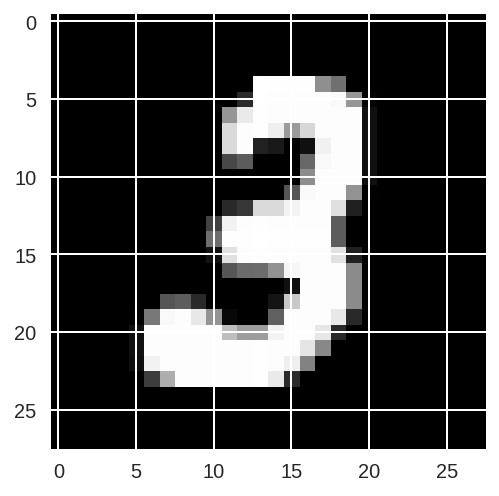

In [0]:
plt.imshow(images[4].numpy().squeeze(), cmap='Greys_r')
print(images[2][0][27][27])
# plt.imshow(images[1][0], cmap='Greys_r')

In [0]:
inputs = images.view(images.shape[0],-1)
# -1 means take as per other given dimensions
print(inputs.shape)
# create parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)

out = torch.mm(h, w2) + b2
print(out)

torch.Size([64, 784])
tensor([[  5.9475,  10.1821,   1.4737,  -0.3342,  16.3933,   5.2823,   4.1023,
           5.8314,  -7.7862,  -3.9814],
        [  0.4081,  13.3941,  11.3838,  -4.4175,  10.8253,   8.9296,   8.0748,
          -3.9728, -10.3940,  -0.6932],
        [  2.2281,   6.3494,   8.4834,  -2.0773,  12.8470,  13.9596,  -1.9648,
           5.5127,  -1.3476,  -1.3802],
        [ -0.7265,   0.8439,   6.1724,   5.8112,  10.9113,   7.0896,  10.4157,
           3.2933,   1.2635,  -3.5526],
        [  3.9180,  13.2920,   8.0640, -10.7833,   7.5900,   6.7365,   6.1159,
           3.9771,   0.5434,  -7.8564],
        [ -4.8508,   5.9965,   6.2858,  -9.8652,   8.2277,  10.0807,  14.7897,
           3.4431,  -2.5305,   2.4932],
        [ -0.7723,   3.8089,   4.8085,  -7.0157,   7.0500,  -0.5522,  18.8460,
           4.2976,  -2.1009,  -3.7155],
        [ -3.0979,  -5.7213,   5.5793,  -4.6116,   4.4038,  12.8740,  -2.1017,
           1.0684,  -6.3324,   2.6111],
        [  5.3114,  -0.019

In [0]:
def softmax(x):
  y = torch.sum(torch.exp(x),dim=1).view(-1,1)
  print('softmax')
  print(y.shape)
  return torch.exp(x)/y

In [0]:
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim =1))
print(probabilities)

softmax
torch.Size([64, 1])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
tensor([[2.9010e-05, 2.0026e-03, 3.3084e-07, 5.4259e-08, 9.9792e-01, 1.4917e-05,
         4.5836e-06, 2.5831e-05, 3.1482e-11, 1.4142e-09],
        [1.8681e-06, 8.1501e-01, 1.0916e-01, 1.4985e-08, 6.2451e-02, 9.3813e-03,
         3.9905e-03, 2.3378e-08, 3.8028e-11, 6.2106e-07],
        [6.0261e-06, 3.7145e-04, 3.1383e-03, 8.1325e-08, 2.4648e-01, 7.4984e-01,
         9.1008

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def _init_(self):
    super()._init_() 
    # It is neccessary to inherit from from nn Module from using neural networks
    
    #784 input nodes and 256 hidden layers
    self.hidden = nn.Linear(784,256)
    
    #10 output layers
    self.output = nn.Linear(256,10)
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [0]:
model = Network()
print(model)

Network()


In [0]:
# or 
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
  def _init_(self):
    super()._init_() 
    # It is neccessary to inherit from from nn Module from using neural networks
    
    #784 input nodes and 256 hidden layers
    self.hidden = nn.Linear(784,256)
    
    #10 output layers
    self.output = nn.Linear(256,10)
    
    
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)
    
    return x

In [0]:
class Network(nn.Module):
  def _init_(self):
    super()._init_() 
    
    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    
    
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x),dim = 1)
    
    return x

In [0]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )

#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()

images,labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
print(images.shape)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

torch.Size([64, 784])
tensor(2.3351, grad_fn=<NllLossBackward>)


autograd - automatically calculating gradient of tensors

In [0]:
x = torch.zeros(1, requires_grad=True)
print(x)
with torch.no_grad():
  y = x*2
z = x*2+6
#y.requires_grad
y.requires_grad

tensor([0.], requires_grad=True)


False

In [0]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 1.9606, -0.5844],
        [ 1.7215,  2.2269]], requires_grad=True)


In [0]:
y = x**2
print(y)

tensor([[3.8441, 0.3415],
        [2.9637, 4.9590]], grad_fn=<PowBackward0>)


In [0]:
z= x*2+5
print(z)

tensor([[7.5937, 3.0958],
        [6.3482, 3.2449]], grad_fn=<AddBackward>)


In [96]:
z=y.mean()
print(z)
print(z.item())

tensor(3.0271, grad_fn=<MeanBackward1>)
3.0270605087280273


In [0]:
print(x.grad)
z.backward()
print(x.grad) # dz/dx => d(x**2/4)/dx => 2x/4 = x/2
print(x/2)

None
tensor([[ 0.9803, -0.2922],
        [ 0.8608,  1.1134]])
tensor([[ 0.9803, -0.2922],
        [ 0.8608,  1.1134]], grad_fn=<DivBackward0>)


AUTOGRAD and LOSS together

In [94]:
# Build a feedforward network

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )

#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
print(images.shape)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

torch.Size([64, 784])
tensor(-0.0547, grad_fn=<NllLossBackward>)


In [0]:
print(model)
print('Before backward pass: w1\n', model[0].weight.grad)
print('Before backward pass: w2\n', model[2].weight.grad)
loss.backward()
print('Afterforward pass: w1\n', model[0].weight.grad)
print('After forward pass: w2\n', model[2].weight.grad)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
Before backward pass: w1
 None
Before backward pass: w2
 None
After backward pass: w1
 tensor([[ 0.0031,  0.0031,  0.0031,  ...,  0.0031,  0.0031,  0.0031],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        ...,
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028]])
After backward pass: w2
 tensor([[-0.0007, -0.0009,  0.0001,  ...,  0.0000, -0.0000, -0.0001],
        [-0.0007, -0.0025, -0.0004,  ...,  0.0001,  0.0001,  0.0004],
        [-0.0005, -0.0009,  0.0000,  ..., -0.0001,  0.0000, -0.0003],
        ...,
        [ 0.

In [0]:
model[0].weight.grad.shape

torch.Size([128, 784])

In [0]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)


In [0]:
print('Initial weights-', model[0].weight)
images,labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients or else gradients are accumulated from previous training pass
optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()

print('Initial weights-', model[0].weight.grad)
#Update the weights
optimizer.step()
print('Weights after backward pass-', model[0].weight)

Initial weights- Parameter containing:
tensor([[ 0.0097, -0.0106, -0.0280,  ..., -0.0182, -0.0305, -0.0033],
        [ 0.0138, -0.0261, -0.0063,  ...,  0.0301, -0.0202, -0.0175],
        [ 0.0271,  0.0264, -0.0276,  ...,  0.0313,  0.0070, -0.0087],
        ...,
        [-0.0085,  0.0156,  0.0116,  ...,  0.0250, -0.0026,  0.0042],
        [ 0.0126,  0.0049,  0.0172,  ...,  0.0101, -0.0017,  0.0294],
        [ 0.0345, -0.0095,  0.0106,  ..., -0.0218, -0.0280,  0.0151]],
       requires_grad=True)
Initial weights- tensor([[-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        ...,
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025]])
Weights after backward pass- Parameter containing

**Training** **the** **real** **model** 

In [11]:
from torch import optim
from torch import nn
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )
optimizer = optim.SGD(model.parameters(), lr=0.003)
#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
print('lenght of trainloader',len(trainloader))
epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
  # Clear the gradients or else gradients are accumulated from previous training pass
    output = model.forward(images)
    loss = criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  else:
    print('Training Loss:', running_loss/len(trainloader))  
    
    

  

lenght of trainloader 938
Training Loss: 1.8931623974334457
Training Loss: 0.8624117887541175
Training Loss: 0.5299039663854184
Training Loss: 0.4325108909880174
Training Loss: 0.38883836370414254
